## Jeu de **Gomoku** avec Monte Carlo Tree Search (MCTS)

- **Projet réalisé par : Ouahbi Haj Kacem**
- **Recherche Monte Carlo et Jeux**
- **Master 2 Big Data, Intelligence Artificielle**

**Introduction du Projet :**
- Le projet consiste en la création d'une version numérique du jeu traditionnel de **Gomoku**, également connu sous le nom de **"Five in a Row"**. Ce jeu se joue sur un plateau de 15x15 cases où deux joueurs s'affrontent en plaçant des pierres de leur couleur (noir ou blanc) pour tenter d'aligner cinq de leurs pierres consécutivement à l'horizontale, à la verticale ou en diagonale.

- Pour rendre ce projet interactif et intelligent, nous avons intégré une intelligence artificielle (IA) basée sur l'algorithme Monte Carlo Tree Search (MCTS). Cet algorithme est largement utilisé dans les jeux de stratégie, car il permet de prendre des décisions optimales en simulant un grand nombre de parties aléatoires à partir d'un état de jeu donné. MCTS est capable de déterminer le meilleur coup en évaluant les résultats possibles de chaque mouvement sur plusieurs itérations.

- En plus de l'IA MCTS, un joueur aléatoire (RandomAI) a été implémenté pour offrir un adversaire simple contre lequel tester l'IA. La combinaison de ces éléments permet non seulement de jouer contre l'ordinateur, mais aussi d'observer la manière dont l'IA choisit ses coups en temps réel.

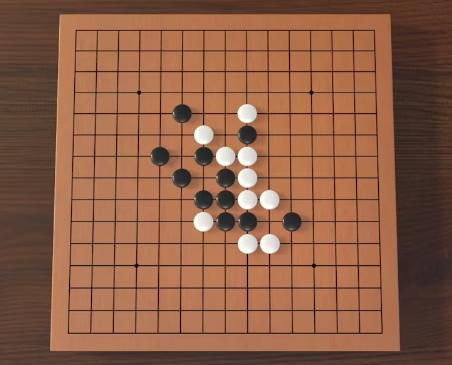

**1. Définir les Règles et la Logique du Jeu**
- Cette étape consiste à définir la structure de base du jeu, c'est-à-dire comment le plateau est représenté, comment les joueurs peuvent effectuer des mouvements, et comment le jeu vérifie si l'un des joueurs a gagné.

**Explication :**

- Classe **'Gomoku'** : Cette classe représente le jeu lui-même. Elle contient une grille (ou plateau) de taille 15x15, qui est initialisée avec des cases vides.
- Constantes : Les constantes 'EMPTY', 'BLACK', et 'WHITE' sont utilisées pour identifier les cases vides et les pierres des joueurs.

**Méthodes :**
- 'is_valid_move(x, y)' : Vérifie si un mouvement est valide, c'est-à-dire si la case est vide et à l'intérieur des limites du plateau.
- 'place_stone(x, y)' : Place une pierre sur le plateau et change de joueur.
- 'check_win(player)' : Vérifie si un joueur a aligné cinq pierres en ligne, colonne, ou diagonale. Cette méthode utilise la fonction 'check_direction' pour vérifier les alignements dans toutes les directions.
- 'is_full()' : Vérifie si le plateau est plein, ce qui indiquerait un match nul si aucun joueur n'a gagné.
- 'print_board()' : Affiche le plateau dans la console, avec des symboles pour les pierres noires, blanches, et les cases vides.

In [1]:
import numpy as np

class Gomoku:
    EMPTY = 0
    BLACK = 1
    WHITE = 2

    def __init__(self, size=15):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)
        self.current_player = Gomoku.BLACK

    def is_valid_move(self, x, y):
        return 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == Gomoku.EMPTY

    def place_stone(self, x, y):
        if self.is_valid_move(x, y):
            self.board[x, y] = self.current_player
            self.current_player = Gomoku.BLACK if self.current_player == Gomoku.WHITE else Gomoku.WHITE
            return True
        return False

    def check_win(self, player):
        # Check horizontal, vertical, and both diagonal directions
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == player:
                    if self.check_direction(x, y, 1, 0, player) or \
                       self.check_direction(x, y, 0, 1, player) or \
                       self.check_direction(x, y, 1, 1, player) or \
                       self.check_direction(x, y, 1, -1, player):
                        return True
        return False

    def check_direction(self, x, y, dx, dy, player):
        count = 0
        for i in range(5):
            nx, ny = x + i * dx, y + i * dy
            if 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx, ny] == player:
                count += 1
            else:
                break
        return count == 5

    def is_full(self):
        return not np.any(self.board == Gomoku.EMPTY)

    def print_board(self):
        print("  " + " ".join([str(i + 1).rjust(2) for i in range(self.size)]))
        for y in range(self.size):
            row = [self.get_symbol(self.board[x, y]) for x in range(self.size)]
            print(f"{y + 1:2} " + " ".join(row))

    def get_symbol(self, value):
        if value == Gomoku.BLACK:
            return 'B'
        elif value == Gomoku.WHITE:
            return 'W'
        else:
            return '.'

# Example usage:
game = Gomoku()
game.print_board()


   1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 1 . . . . . . . . . . . . . . .
 2 . . . . . . . . . . . . . . .
 3 . . . . . . . . . . . . . . .
 4 . . . . . . . . . . . . . . .
 5 . . . . . . . . . . . . . . .
 6 . . . . . . . . . . . . . . .
 7 . . . . . . . . . . . . . . .
 8 . . . . . . . . . . . . . . .
 9 . . . . . . . . . . . . . . .
10 . . . . . . . . . . . . . . .
11 . . . . . . . . . . . . . . .
12 . . . . . . . . . . . . . . .
13 . . . . . . . . . . . . . . .
14 . . . . . . . . . . . . . . .
15 . . . . . . . . . . . . . . .


**2. Implémenter une IA Basique (Random Moves)**
- L'objectif c'est de créer une IA simple qui peut jouer au jeu de manière aléatoire. Cette IA ne vise pas à être intelligente, mais plutôt à s'assurer que la logique du jeu fonctionne correctement avant de passer à des algorithmes plus sophistiqués.

**Explication :**

- Classe **'RandomAI'** : Cette classe représente une IA qui choisit un mouvement valide aléatoirement.
- Méthode **'get_move()'** : Cette méthode retourne une position aléatoire parmi les cases vides disponibles sur le plateau.

In [2]:
import random

class RandomAI:
    def __init__(self, game):
        self.game = game

    def get_move(self):
        empty_positions = np.argwhere(self.game.board == Gomoku.EMPTY)
        move = random.choice(empty_positions)
        return tuple(move)  # tuple (x, y)


**3. Implémenter MCTS pour une IA plus Sophistiquée :**
- L'objectif c'est d'implémenter l'algorithme **Monte Carlo Tree Search (MCTS)**, qui permet à l'IA de prendre des décisions plus intelligentes en simulant des milliers de parties possibles à partir de l'état actuel du jeu.

**Explication :**

- **MCTS** : MCTS est un algorithme qui explore différentes possibilités en simulant plusieurs fois les suites de mouvements possibles depuis l'état actuel du jeu. L'algorithme se compose de quatre étapes principales :
 - **Sélection** (select_child) : Choisit le nœud enfant à explorer basé sur un critère d'exploration/exploitation (en utilisant une formule appelée UCT).
 - **Expansion** (expand) : Ajoute un nouveau nœud à l'arbre de recherche en simulant un mouvement non encore exploré.
 - **Simulation** (simulate_random_game) : Joue une partie complète en choisissant des mouvements aléatoires à partir du nœud actuel pour estimer le résultat final.
 - **Rétropropagation** (update) : Met à jour les statistiques du nœud et de ses ancêtres en fonction du résultat de la simulation.
- Classe **'MCTSNode'** : Représente un état du jeu dans l'arbre MCTS.
 - Méthodes select_child(), expand(), simulate_move() et update() : Gèrent la sélection des nœuds, l'expansion de l'arbre, la simulation de mouvements, et la mise à jour des statistiques de l'arbre de recherche.

**Pourquoi c'est important :**
- **MCTS** est une méthode puissante qui permet à l'IA de jouer de manière beaucoup plus compétente en explorant différentes options et en évaluant leur efficacité sur le long terme. Cette IA est capable de réfléchir plusieurs coups à l'avance, ce qui la rend bien plus difficile à battre que l'IA aléatoire.

In [3]:
class MCTSNode:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.visits = 0
        self.wins = 0
        self.untried_moves = self.get_legal_moves()

    def get_legal_moves(self):
        empty_positions = np.argwhere(self.state.board == Gomoku.EMPTY)
        return [tuple(pos) for pos in empty_positions]

    def select_child(self):
        # Select child with highest UCT value
        return max(self.children, key=lambda c: c.wins / c.visits + np.sqrt(2 * np.log(self.visits) / c.visits))

    def expand(self):
        move = self.untried_moves.pop()
        next_state = self.simulate_move(move)
        child_node = MCTSNode(next_state, parent=self)
        self.children.append(child_node)
        return child_node

    def simulate_move(self, move):
        new_state = Gomoku(size=self.state.size)
        new_state.board = np.copy(self.state.board)
        new_state.current_player = self.state.current_player
        new_state.place_stone(*move)
        return new_state

    def update(self, result):
        self.visits += 1
        self.wins += result

    def is_fully_expanded(self):
        return len(self.untried_moves) == 0

    def is_terminal_node(self):
        return self.state.check_win(Gomoku.BLACK) or self.state.check_win(Gomoku.WHITE) or self.state.is_full()


In [4]:
class MCTS:
    def __init__(self, game, itermax=1000):
        self.game = game
        self.itermax = itermax

    def search(self):
        root = MCTSNode(self.game)
        for _ in range(self.itermax):
            node = root
            # Sélection
            while node.is_fully_expanded() and not node.is_terminal_node():
                node = node.select_child()

            # Expansion
            if not node.is_terminal_node():
                node = node.expand()

            # Simulation
            result = self.simulate_random_game(node.state)

            # Rétropropagation
            while node is not None:
                node.update(result)
                node = node.parent

        # Retourner le mouvement le plus visité
        best_child = max(root.children, key=lambda c: c.visits)
        best_move = best_child.state  # best_child.state est un état du jeu complet

        # Comparer l'état actuel du plateau avec l'état du meilleur mouvement
        for x in range(self.game.size):
            for y in range(self.game.size):
                if self.game.board[x, y] != best_move.board[x, y]:
                    return (x, y)  # Retourner les coordonnées du coup qui a été joué

        raise Exception("Aucun mouvement n'a été trouvé !")  # Cela ne devrait jamais arriver

    def simulate_random_game(self, state):
        current_game = Gomoku(size=state.size)
        current_game.board = np.copy(state.board)
        current_game.current_player = state.current_player

        while not current_game.check_win(Gomoku.BLACK) and not current_game.check_win(Gomoku.WHITE) and not current_game.is_full():
            move = RandomAI(current_game).get_move()
            current_game.place_stone(*move)

        if current_game.check_win(Gomoku.BLACK):
            return 1 if state.current_player == Gomoku.BLACK else 0
        elif current_game.check_win(Gomoku.WHITE):
            return 1 if state.current_player == Gomoku.WHITE else 0
        return 0.5  # Draw

# Example usage:
game = Gomoku()
mcts = MCTS(game)
next_board = mcts.search()

In [5]:
# Example usage:
game = Gomoku()
mcts = MCTS(game)
next_board = mcts.search()

**4. Interface Utilisateur en Console :**
- L'objectif c'est d'interagir avec le jeu et l'IA via une interface en ligne de commande. Cela inclut l'affichage du plateau de jeu, la gestion des entrées utilisateur, et l'affichage des résultats.

**Explication :**

- Fonction **'play_game()'** : Gère la boucle principale du jeu où l'IA et l'humain alternent leurs mouvements.
 - **Affichage du plateau :** Le plateau est affiché après chaque coup, permettant aux joueurs de voir l'évolution du jeu.
 - **Choix des mouvements :** L'humain peut entrer ses coups sous forme de coordonnées, et l'IA utilise MCTS pour choisir les siens.
 - **Vérification de la victoire ou du match nul :** Après chaque coup, le jeu vérifie si quelqu'un a gagné ou si le plateau est plein, ce qui met fin à la partie.

In [6]:
def play_game():
    game = Gomoku()
    mcts = MCTS(game)
    random_ai = RandomAI(game)

    while not game.is_full() and not game.check_win(Gomoku.BLACK) and not game.check_win(Gomoku.WHITE):
        game.print_board()
        if game.current_player == Gomoku.BLACK:
            print("Tour de l'IA (Noir)")
            move = mcts.search()
        else:
            print("Tour du joueur (Blanc)")
            move = random_ai.get_move()

        print(f"Le coup choisi est: {move}")
        game.place_stone(*move)

    game.print_board()
    if game.check_win(Gomoku.BLACK):
        print("L'IA (Noir) a gagné !")
    elif game.check_win(Gomoku.WHITE):
        print("Le joueur (Blanc) a gagné !")
    else:
        print("Match nul.")

play_game()


   1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 1 . . . . . . . . . . . . . . .
 2 . . . . . . . . . . . . . . .
 3 . . . . . . . . . . . . . . .
 4 . . . . . . . . . . . . . . .
 5 . . . . . . . . . . . . . . .
 6 . . . . . . . . . . . . . . .
 7 . . . . . . . . . . . . . . .
 8 . . . . . . . . . . . . . . .
 9 . . . . . . . . . . . . . . .
10 . . . . . . . . . . . . . . .
11 . . . . . . . . . . . . . . .
12 . . . . . . . . . . . . . . .
13 . . . . . . . . . . . . . . .
14 . . . . . . . . . . . . . . .
15 . . . . . . . . . . . . . . .
Tour de l'IA (Noir)
Le coup choisi est: (6, 6)
   1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 1 . . . . . . . . . . . . . . .
 2 . . . . . . . . . . . . . . .
 3 . . . . . . . . . . . . . . .
 4 . . . . . . . . . . . . . . .
 5 . . . . . . . . . . . . . . .
 6 . . . . . . . . . . . . . . .
 7 . . . . . . B . . . . . . . .
 8 . . . . . . . . . . . . . . .
 9 . . . . . . . . . . . . . . .
10 . . . . . . . . . . . . . . .
11 . . . . . . . . . . . . . . .
1

**Conclusion : Analyse du Résultat Final**

- À la fin de la partie, le joueur contrôlé par l'IA RandomAI (Blanc) a remporté la victoire en alignant cinq pierres de manière consécutive. Cette victoire illustre l'imprévisibilité inhérente à l'utilisation d'une stratégie de jeu aléatoire, mais souligne également les limites de celle-ci en comparaison avec une IA plus sophistiquée comme MCTS.

- Malgré l'utilisation d'un algorithme avancé pour jouer le rôle du joueur noir, la stratégie aléatoire a triomphé dans cette partie spécifique. Cela peut s'expliquer par plusieurs facteurs, tels que la nature des coups sélectionnés par l'IA aléatoire et les configurations particulières du plateau.
- En revanche, dans un grand nombre de simulations, on s'attendrait à ce que l'IA MCTS, qui prend en compte une exploration plus approfondie des possibilités de jeu, gagne plus fréquemment en raison de ses décisions plus informées et optimisées.

Ce projet met en lumière l'efficacité du MCTS dans les jeux de stratégie tout en illustrant les résultats imprévisibles qui peuvent survenir lorsque des éléments aléatoires sont introduits dans le processus décisionnel.